In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import random
import math
from scipy import stats
import cvxpy as cp
from scipy import stats

from integer_programming import IntProg
from random_descent import *

In [4]:
def ObjVal(a,x):
    a = np.array(a)
    x = np.array(x)
    n = x.shape[0]
    m = x.shape[1]
    a = a.reshape(m, n*n)
    
    x_comb = np.zeros((a.shape))
    for i in np.arange(a.shape[0]): # loop over each item i
        for j in np.arange(a.shape[1]): #loop over each element of a^{i}
            # a_row corresponds to the index ji and a_col corresponds to the index ki
            a_row, a_col = (math.floor(j / n), j % n)
            if a_row != a_col:
                x_comb[i][j] = x[a_row][i] * x[a_col][i]
    
    out_mat = a*x_comb
    return np.sum(out_mat)

71


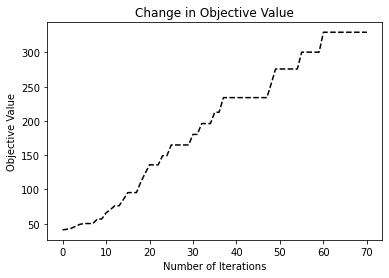

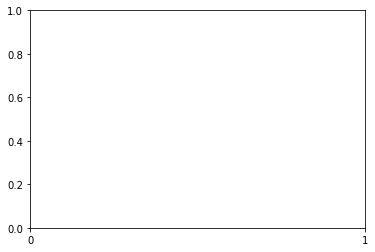

In [56]:
n = 30
m = 10

a = np.random.rand(m,n,n)
x, obj_vals = RandomDescent(a)

num_iter = np.arange(len(obj_vals))

plt.plot(num_iter, obj_vals, color = 'black', linestyle = '--', label='')
plt.title('Change in Objective Value')
plt.ylabel('Objective Value')
plt.xlabel('Number of Iterations')
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    

In [ ]:
#50

ip_list = []
rd_list = []
n_vals = []

m = 10

for i in range(40):
    n = i + m
    print(n)

    d = {}
    a = []

   
    #Random Binary Assignment Method
    for j in range(m):
        d["a{0}".format(j)] = np.zeros((n,n))
    
        seed = np.arange(n)

        num_idcs = math.floor(n/3)

        rngx = np.random.choice(seed,num_idcs, replace=False, p=None)
        rngy = np.random.choice(seed,num_idcs, replace=True,p=None)
        d["a{0}".format(j)][rngx, rngy] = 1
        
        rngx2 = np.random.choice(seed,num_idcs, replace=False, p=None)
        rngy2 = np.random.choice(seed,num_idcs, replace=True,p=None)
        d["a{0}".format(j)][rngx2, rngy2] = 0.5
        a.append(d["a{0}".format(j)])

    a = np.array(a)
    
    x_ip = IntProg(a)
    x_rd, dummy = RandomDescent(x_cp)
    
    ip_list.append(ObjVal(a,x_ip))
    rd_list.append(ObjVal(a,x_rd))
    n_vals.append(n)
    print(i)

print(ip_list)
print(rd_list)
print(n_vals)

plt.plot(n_vals, ip_list, color = 'red', linestyle = '-', label='Integer Programming')
plt.plot(n_vals, rd_list, color = 'blue', linestyle = '-', label='Randomized Descent')
plt.title('Objective values of different Optimizing algorithms')
plt.ylabel('Objective Value')
plt.xlabel('Number of Agents')
plt.legend()
plt.show()